# Jobhunt stats of 2018 - matplotlib, pandas & numpy

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


df = pd.read_csv(
    "jobhunt.csv",
    delimiter=";"
    )

# Investigating and modifying dataframe

In [2]:
df.tail(5)

Unnamed: 0   company        time interviewed  Unnamed: 4  Unnamed: 5  \
147       148.0  Logentia  2018-12-10         NaN         NaN         NaN   
148         NaN       NaN         NaN         NaN         NaN         NaN   
149         NaN       NaN         NaN         NaN         NaN         NaN   
150         NaN       NaN         NaN         NaN         NaN         NaN   
151         NaN       NaN         NaN         NaN         NaN         NaN   

     Unnamed: 6  Unnamed: 7  
147         NaN         NaN  
148         NaN         NaN  
149         NaN         NaN  
150         NaN         NaN  
151         NaN         NaN

In [3]:
# CHECKING nan values from dataframe

df.isna().sum()

# -> it appears that the end of the dataframe has nan values

Unnamed: 0       4
company          4
time             4
interviewed    132
Unnamed: 4     152
Unnamed: 5     152
Unnamed: 6     152
Unnamed: 7     152
dtype: int64

In [4]:
# DROPPING nan values from selected column and saving data to a new variable

df.dropna(
    subset=["company", "time"], 
    how="any",
    inplace=True
    )

In [5]:
"""CHECKING how the end of our dataframe looks like
- column "interviewed" can still have nan values"""

df.tail(3)

Unnamed: 0    company        time interviewed  Unnamed: 4  Unnamed: 5  \
145       146.0  valtiolle  2018-12-04         NaN         NaN         NaN   
146       147.0   Upseller  2018-12-05         NaN         NaN         NaN   
147       148.0   Logentia  2018-12-10         NaN         NaN         NaN   

     Unnamed: 6  Unnamed: 7  
145         NaN         NaN  
146         NaN         NaN  
147         NaN         NaN

In [6]:
"""DOUBLE checking with the table that nan values 
aren't amon, mainly "time"-column"""

df.isna().sum()

Unnamed: 0       0
company          0
time             0
interviewed    128
Unnamed: 4     148
Unnamed: 5     148
Unnamed: 6     148
Unnamed: 7     148
dtype: int64

In [7]:
"""SPLITTING time -column to month-only
This way we can use it to group dataset by month"""

df['time'] = df.time.apply(lambda x: x.split('-')[-2])

# Setting data ready for plotting

In [8]:
# Outputting "time"-column to a list for month_applied -variable

application_per_month = \
    df.groupby("time")\
    .time.count()\
    .tolist()


# Appending missing values to compleate the whole year

all_application_per_month = \
    application_per_month[:9] \
    + [0,0] \
    + application_per_month[9:]


"""OUTPUTTING unique values from time to months_grouped_to_months 
also coz the output of unique() is a float we change it to type int 
and list"""

months_grouped_to_months = \
    df.time.unique()\
    .astype(int)\
    .tolist()


"""APPENDING missing month values to complete the whole year on 
all_months_grouped_to_months"""

all_months_grouped_to_months = \
    months_grouped_to_months[:9] \
    + [10,11] \
    + months_grouped_to_months[9:]


"""WILL count the highest month and adds +5 - just testing some
highest_values = df["aika"].astype(int).max() 
print(highest_values + 5)"""

print(application_per_month)
print(all_application_per_month)

print(months_grouped_to_months)
print(all_months_grouped_to_months)


[3, 4, 22, 30, 17, 15, 9, 25, 18, 5]
[3, 4, 22, 30, 17, 15, 9, 25, 18, 0, 0, 5]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [9]:
df.tail(3)

Unnamed: 0    company time interviewed  Unnamed: 4  Unnamed: 5  \
145       146.0  valtiolle   12         NaN         NaN         NaN   
146       147.0   Upseller   12         NaN         NaN         NaN   
147       148.0   Logentia   12         NaN         NaN         NaN   

     Unnamed: 6  Unnamed: 7  
145         NaN         NaN  
146         NaN         NaN  
147         NaN         NaN

In [10]:
# SETTING interviewed column ready for plotting

was_interviewed = \
    df.groupby("time")\
    .interviewed\
    .count()\
    .tolist()

print(was_interviewed)


# APPENDING missing months to a list

october_november = [0,0]

was_interviewed_all_months = \
    was_interviewed[:9] \
    + october_november \
    + was_interviewed[9:]

print(was_interviewed_all_months)

[0, 0, 1, 3, 2, 4, 1, 3, 6, 0]
[0, 0, 1, 3, 2, 4, 1, 3, 6, 0, 0, 0]


# Plotting the data

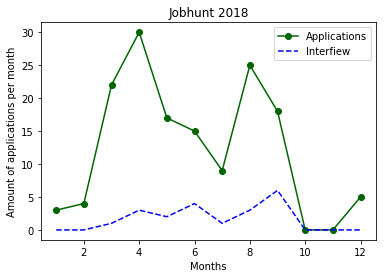

In [11]:
# PLOTTING the whole thingamathing with matplotlib

plt.plot(
        all_months_grouped_to_months, 
        all_application_per_month, 
        color="darkgreen", marker="o"
        )


plt.plot(
        all_months_grouped_to_months, 
        was_interviewed_all_months, 
        color="blue", linestyle="--"
        )


plt.title("Jobhunt 2018")
plt.xlabel("Months")
plt.ylabel("Amount of applications per month")
legend_label = ["Applications", "Interfiew"]


plt.legend(legend_label, loc=1)
plt.show()

/Users/matiaspehkonen/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


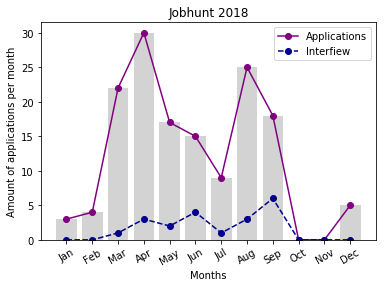

In [16]:
# JUST another df focusing bit more for the design

plt.plot(
        all_months_grouped_to_months, 
        all_application_per_month, 
        color="purple", 
        marker="o"
        )


plt.bar(
        all_months_grouped_to_months, 
        all_application_per_month, 
        color="lightgray"
       )


plt.plot(
        all_months_grouped_to_months, 
        was_interviewed_all_months, 
        color="darkblue", 
        linestyle="--", 
        marker="o"
        )

# SETTING new names for xticks
month_names = [
    "Jan", "Feb", "Mar", 
    "Apr", "May", "Jun", 
    "Jul", "Aug", "Sep", 
    "Oct", "Nov", "Dec"
    ]


# MAKING things neat
plt.title("Jobhunt 2018")
plt.xlabel("Months")
plt.ylabel("Amount of applications per month")

legend_label = ["Applications", "Interfiew"]
plt.legend(legend_label, loc=1)

ax = plt.subplot()
ax.set_xticks(all_months_grouped_to_months)
ax.set_xticklabels(month_names, rotation=30)

plt.show()


Text(0,0.5,'Plot two')

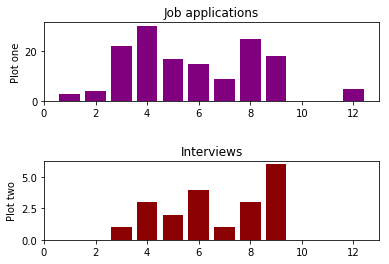

In [17]:
# SHOWING off with mad subplot skills with first plot

plt.subplot(2, 1, 1)

plt.bar(
    all_months_grouped_to_months, all_application_per_month, 
    color="purple"
    )


# TITLE and label for the first plot

plt.title("Job applications")
plt.ylabel("Plot one")


# SECOND plot amazing plot

plt.subplot(2, 1, 2)
plt.subplots_adjust(hspace=0.75)

plt.bar(
    all_months_grouped_to_months, 
    was_interviewed_all_months, 
    color="darkred" 
    )


# TITLE and label for the second plot

plt.title("Interviews")
plt.ylabel("Plot two")


# Playing around with pie chart

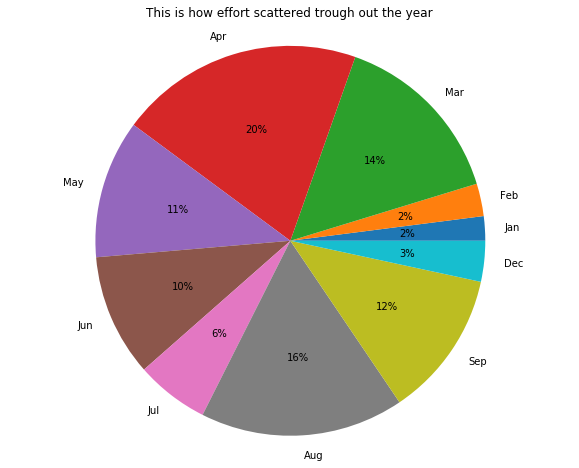

In [18]:
"""TRYING first to create pie with pre-existing
values, but noticed there are zeroes involved.

So first I needed to delete zero's from the list, 
but then the label got too long, so went on did
the slice editing for the values on labels as well"""

# REMOVING zero's from the list with numpy

zero_removed_from_application_list =  \
    np.array([all_application_per_month]) \
    [(np.array([all_application_per_month]) \
    > 0)].astype(int).tolist()

# PRINTING values to check them
# print(zero_removed_from_application_list)


# SPLITTING month_names to new superduber_list variable

month_names_one = month_names[0:9]
month_names_two = month_names[-1:]

superduber_list = month_names_one + month_names_two

# MAKING sure that he values are ok
# print(superduber)


# POSITIONIN piechart

plt.figure(figsize=(10, 8))


# PLOTTING pie
plt.pie(
    zero_removed_from_application_list,
    labels=superduber_list, \
    autopct="%d%%"
    )


plt.axis("equal")
plt.title("This is how effort scattered trough out the year")
plt.show()

# WANNA save? -> plt.savefig("my_pie_chart.png")



# Few lines on statistics

In [23]:
# MEDIAN of the values - rounded to 0 decimals

median_all_application_per_month =\
    np.median(all_application_per_month)\
    .round(decimals=0)

# PRINT median

print(
    "The median of the applications is: {}"\
    .format(median_all_application_per_month)
    )


# MEAN calculations - rounding value to 1 decimal

mean_all_application_per_month =\
    np.mean(all_application_per_month)\
    .round(decimals=1)

# PRINT mean

print("The mean, %s, is also a good number per month."\
    % mean_all_application_per_month)


"""STANDARD deviation aka the avg distance 
of the values 
from the mean - rounding value to 1 decimal"""

std_all_application_per_month =\
    np.std(all_application_per_month)\
    .round(decimals=1)

# PRINT STD - I think this is not the prettiest way to split the text input

print(
    "I don't know what is the use of std at this " \
    + "dataset, but I suppose it represents that " \
    + "I can count standard deviation: " \
    + str(std_all_application_per_month) \
    + " as well."
    )


The median of the applications is: 12.0
The mean, 12.3, is also a good number per month.
I don't know what is the use of std at this dataset, but I suppose it represents that I can count standard deviation: 9.8 as well.
